# Supervised models predicting cubic perovskites

In this notebook, we will indulge into different supervised models. So far, this includes RandomForest and Gradient Boost. We will be using the library of scikitlearn to do this.

The notebook has been modular for further implementation of other machine learning algorithms. It should be relatively straight forward to add more algorithms. 

Starting off with some basic imports. 

In [1]:
import sys
sys.path.insert(0, "../")

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from pathlib import Path
data_dir   = Path.cwd().parent / "data" 
models_dir = Path.cwd().parent / "models"

print("Current data directory {}".format(data_dir))
print("Current models directory {}".format(models_dir))

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-perovskites/data
Current models directory /home/oliver/Dokumenter/masterprosjekt/predicting-perovskites/models


In [2]:
from src.models import train_model, predict_model
from src.features import build_features
from src.visualization import visualize

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#Feature selections
from sklearn.model_selection import RepeatedStratifiedKFold

#metrics and nice visualization
from tqdm import tqdm

# setting random seed for reproducibility
random_state=98127480

Then we can read the preprocessed data using pandas library. 

In [4]:
X = pd.read_csv(data_dir / "processed" / "X.csv")
y = pd.read_csv(data_dir / "processed" / "target.csv")
data = pd.read_csv(data_dir / "processed" / "data.csv")

X

rA     rB  MA  MB    dAO    dBO  rA/rO  rB/rO      t
0    1.460  0.760  65  86  1.805  2.060  1.081  0.563  0.942
1    1.460  0.470  65  95  1.805  1.840  1.081  0.348  1.092
2    1.460  0.130  65  82  1.805  1.432  1.081  0.096  1.343
3    1.460  0.380  65  83  1.805  1.604  1.081  0.281  1.149
4    1.460  0.600  65  85  1.805  1.942  1.081  0.444  1.019
..     ...    ...  ..  ..    ...    ...    ...    ...    ...
385  1.196  0.645  12  52  2.014  1.732  0.886  0.478  0.902
386  1.196  0.600  12  61  2.014  1.750  0.886  0.444  0.923
387  1.196  0.745  12  11  2.014  1.849  0.886  0.552  0.859
388  1.196  0.670  12  43  2.014  1.791  0.886  0.496  0.891
389  1.196  0.640  12  46  2.014  1.749  0.886  0.474  0.905

[390 rows x 9 columns]

# Algorithms

Below we define the algorithm to use and its abbreviation. Parameters that are optional to tune are the parameters to the algoriths, with the default value as their optimised value. Another parameter to tune is how many cross-validations one wants to iterate through for the analysis. In addition, one has to find the best features for a new algorithm which will be added further down in the notebook.

In [5]:
InsertAlgorithms    = [LogisticRegression(random_state=random_state),
                       RandomForestClassifier    (random_state=random_state),\
                       GradientBoostingClassifier(random_state=random_state)]
InsertAbbreviations = ["LOG", "RF", "GB"]
InsertPrettyNames   = ["Logistic regression", "Random Forest", "Gradient Boost"]

# Dataset analysis

## Optimal hyperparameters search

In this section we will find the optimal parameters used for the various algorithms. We will use imblearn's Pipeline and its implemented samplers, such as SMOTE and RandomUnderSampler. The advantage of using imblearn instead of sklearn, is that sklearn's pipeline will fit the samplers to the validation data as well, while imblearn only fit the resamplers to the training data.

In [6]:
## TEST

#rskfold = RepeatedStratifiedKFold(n_splits=numberSplits, n_repeats=numberRuns, random_state=random_state)

#a, grid = applyGridSearch(X = X, y = y.values.reshape(-1,), model=InsertAlgorithms[0], cv = rskfold, sampleMethod="")

In [7]:
numberRuns=10
numberSplits = 10

includeSampleMethods = ["", "under"]#, "over", "both"]

Abbreviations = []
prettyNames   = []
Algorithms = []

rskfold = RepeatedStratifiedKFold(n_splits=numberSplits, n_repeats=numberRuns, random_state=random_state)

PerovskiteModelsBestParams = pd.Series({}, dtype="string")

for i, algorithm in tqdm(enumerate(InsertAlgorithms)):
    for method in includeSampleMethods:
        print("Finding best params for: {}".format(InsertAbbreviations[i] + " " + method))
        bestEstimator, PerovskiteModelsBestParams[InsertAbbreviations[i] + " " + method] = train_model.applyGridSearch(
                                                                            X = X, 
                                                                            y = y.values.reshape(-1,), 
                                                                        model = algorithm, 
                                                                           cv = rskfold, 
                                                                 sampleMethod = method)
        Abbreviations.append(InsertAbbreviations[i] + " " + method)
        prettyNames.append(InsertAbbreviations[i] + " " + method)
        Algorithms.append(bestEstimator)

0it [00:00, ?it/s]

Finding best params for: LOG 
Finding best params for: LOG under


1it [00:04,  4.19s/it]

Finding best params for: RF 
Finding best params for: RF under


2it [03:43, 130.86s/it]

Finding best params for: GB 
Finding best params for: GB under


3it [03:48, 76.07s/it] 


### One time cross-validating 100 for learning perovskite structure
Under follows the general model runModel that takes the as parameter which model to run and returns nice statistics formatted as a dictionary. 

## Running the different supervised models
This is where we generate a lot of different models, and thus will take some time to execute. 



In [8]:
PerovskiteModels = pd.Series({}, dtype="string")

4it [00:00, 35.02it/s]

Current training algorithm: LOG 


100it [00:02, 36.10it/s]
findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


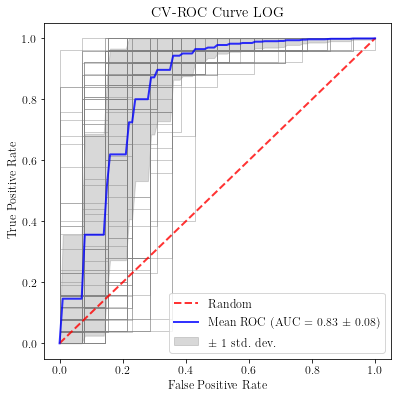

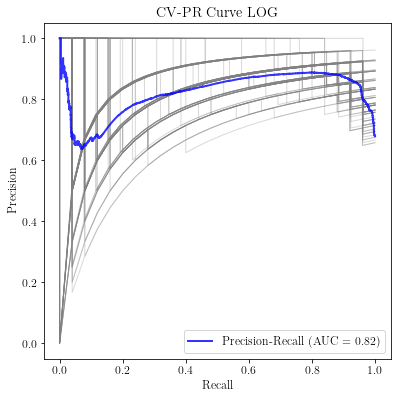

4it [00:00, 37.62it/s]

Mean accuracy:0.85385
Standard deviation:0.04925
f1-score:0.89286
Current training algorithm: LOG under


100it [00:02, 35.69it/s]


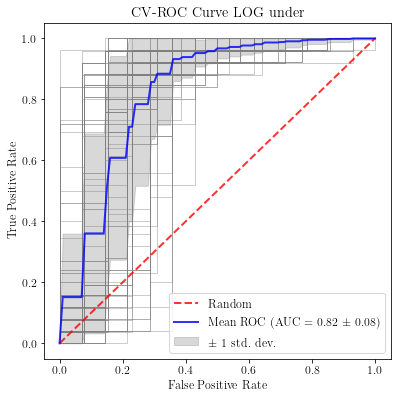

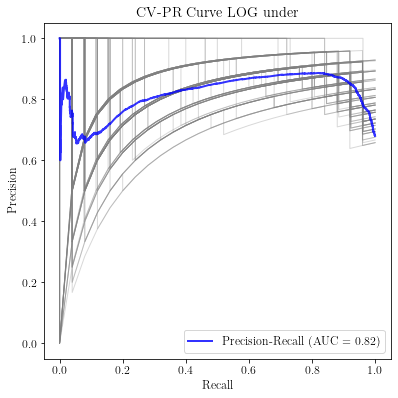

0it [00:00, ?it/s]

Mean accuracy:0.83103
Standard deviation:0.05524
f1-score:0.86792
Current training algorithm: RF 


100it [02:07,  1.27s/it]


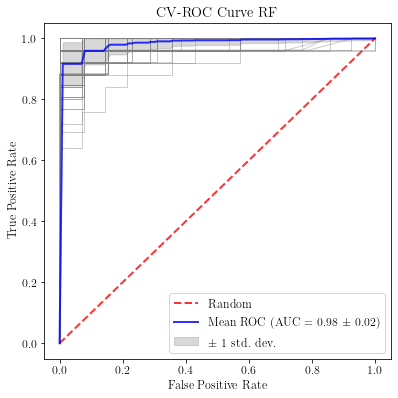

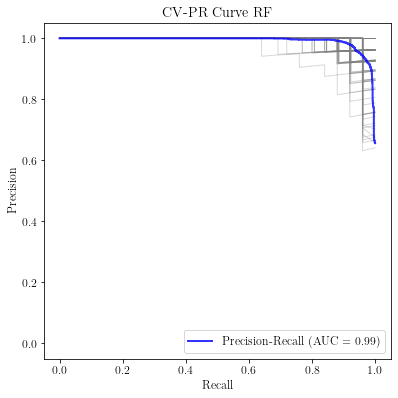

0it [00:00, ?it/s]

Mean accuracy:0.93718
Standard deviation:0.03541
f1-score:0.90566
Current training algorithm: RF under


100it [02:04,  1.25s/it]


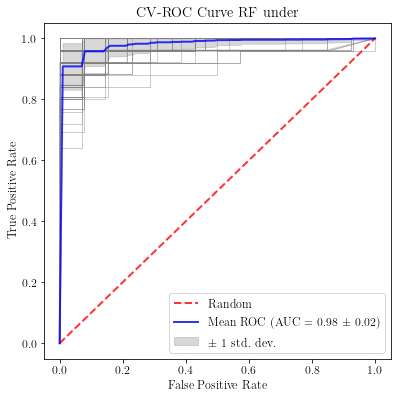

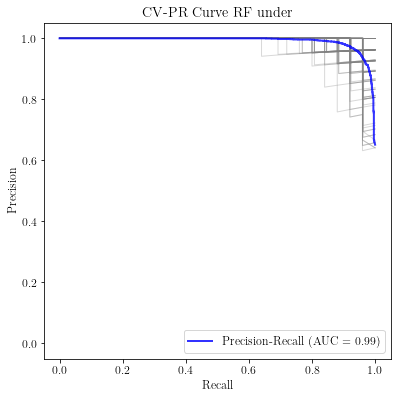

3it [00:00, 28.12it/s]

Mean accuracy:0.93385
Standard deviation:0.03519
f1-score:0.92308
Current training algorithm: GB 


100it [00:03, 29.28it/s]


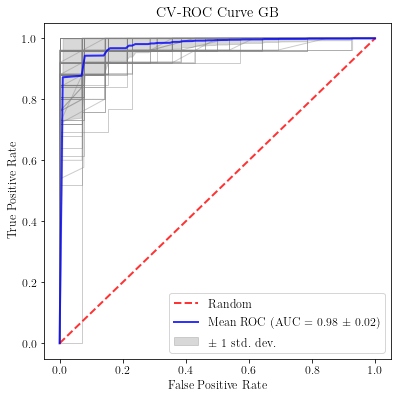

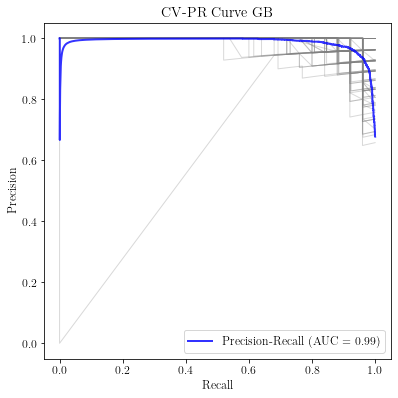

3it [00:00, 27.74it/s]

Mean accuracy:0.92667
Standard deviation:0.04119
f1-score:0.90909
Current training algorithm: GB under


100it [00:03, 27.77it/s]


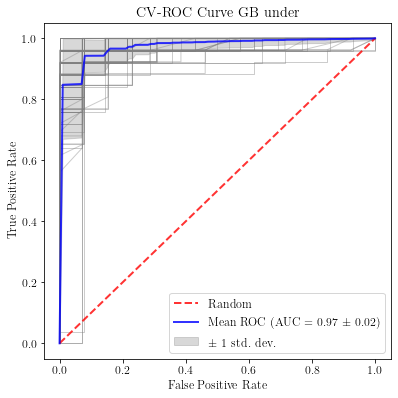

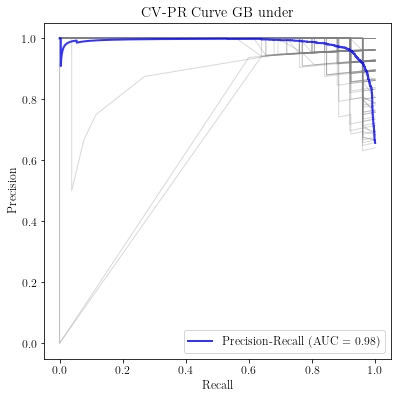

Mean accuracy:0.92462
Standard deviation:0.04242
f1-score:0.90196


In [9]:
for i, algorithm in enumerate(Algorithms): 
    print("Current training algorithm: {}".format(prettyNames[i]))
    PerovskiteModels[Abbreviations[i]] = (
        visualize.runSupervisedModel(classifier  = algorithm, 
                                     X = X,
                                     y = y.values.reshape(-1,),
                                     k = numberSplits,
                                     n = numberRuns,
                                    cv = rskfold,
                     featureImportance = True,
                                 title = prettyNames[i]))

### Visualising the results

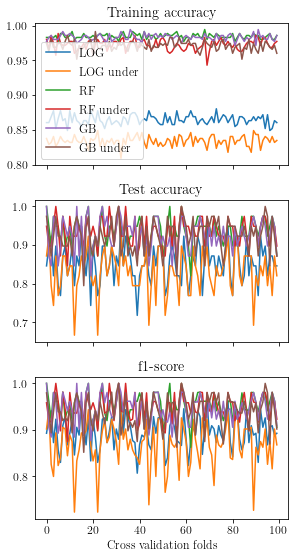

In [10]:
visualize.plot_accuracy(PerovskiteModels, prettyNames)

The standard deviation is calculated as a function difference of the 100 models in the purpose of visalizing how much the models deviate from each other.
### Interpreting important features used by the model

In [11]:
visualize.plot_important_features(PerovskiteModels, prettyNames, X=X, k = numberSplits, n = numberRuns)

Here we see that random forrest is heavily dependent on four features, while gradient boost is more dependent on three features. We set a limit that the feature needs to be important in at least 50 percent of the classifications.

Feature importance is here calculated from the last iteration of the training, and not as mean from the entire dataset. 

## "Confusion" metrics

### Sorting as a function of alphabetic order

In [12]:
visualize.plot_confusion_metrics(PerovskiteModels, prettyNames, data, k = numberSplits, n = numberRuns)

In these plots we see that gradient boost is more likely to misclassify a wider variation of compounds, with an exception for MgSiO3 for false negatives. Random forest, on the other hand, is more likely to misclassify the same compounds for all models.  
### Sorting as a function of tolerance factor

In [13]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="False positives (Nruns = {})".format(numberSplits*numberRuns)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='tolerance factor')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['t'][model['falsePositives'] > 0],
                          y=model['falsePositives'][model['falsePositives'] > 0],
                          text=data['Compound'][model['falsePositives'] > 0],
                          )
                  )

fig.update_layout(barmode='group')
fig.add_trace(go.Scatter(x=[0.73,0.75], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Not a perovskite'))

fig.add_trace(go.Scatter(x=[0.75,0.9], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Orthorombic perovskite'))
fig.add_trace(go.Scatter(x=[0.9,1.0], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Cubic perovskite'))
fig.add_trace(go.Scatter(x=[1.0,1.15], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Hexagonal nonperovskite'))

fig.show()

From the false positive plot above, we see that there are several compounds with the same tolerance factor, giving rise to several more counts per tolerance factor compared to what is actually shown.

In [14]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="falseNegatives (Nruns = {})".format(numberSplits*numberRuns)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='tolerance factor')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['t'][model['falseNegatives'] > 0],
                          y=model['falseNegatives'][model['falseNegatives'] > 0],
                          text=data['Compound'][model['falseNegatives'] > 0],
                          )
                  ) 
fig.update_layout(barmode='group')

fig.add_trace(go.Scatter(x=[0.73,0.75], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Not a perovskite'))

fig.add_trace(go.Scatter(x=[0.75,0.9], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Orthorombic perovskite'))
fig.add_trace(go.Scatter(x=[0.9,1.0], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Cubic perovskite'))
fig.add_trace(go.Scatter(x=[1.0,1.15], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Hexagonal nonperovskite'))

fig.show()

In [15]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="falseNegatives (Nruns = {})".format(numberRuns*numberSplits)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='MA')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['MA'][model['falseNegatives'] > 0],
                          y=model['falseNegatives'][model['falseNegatives'] > 0],
                          text=data['Compound'][model['falseNegatives'] > 0],
                          )
                  ) 
fig.show()

In [16]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="falseNegatives (Nruns = {})".format(numberRuns*numberSplits)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='MB')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['MB'][model['falseNegatives'] > 0],
                          y=model['falseNegatives'][model['falseNegatives'] > 0],
                          text=data['Compound'][model['falseNegatives'] > 0],
                          )
                  ) 
fig.show()

# Which perovskites are correctly predicted?

Out of 100 different runs, the article yield a prediction if over 50% of the predictions are in favor for either perovskite or not. 

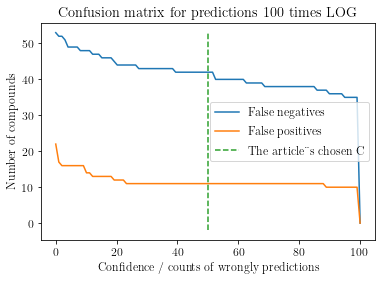

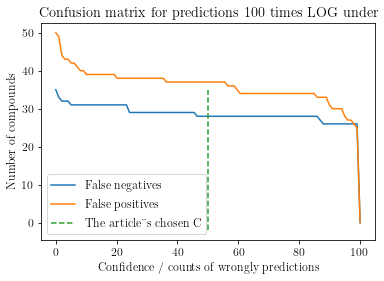

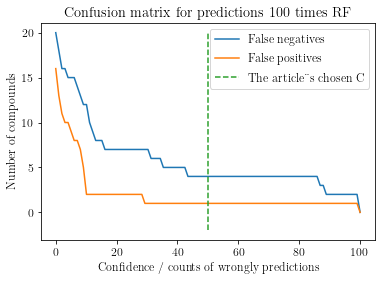

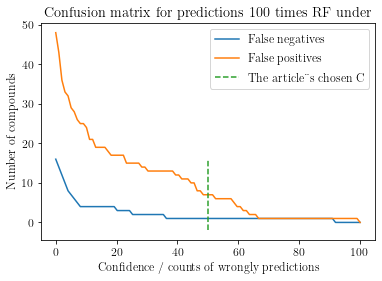

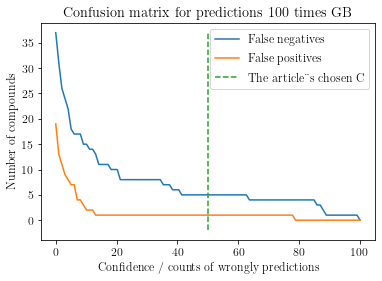

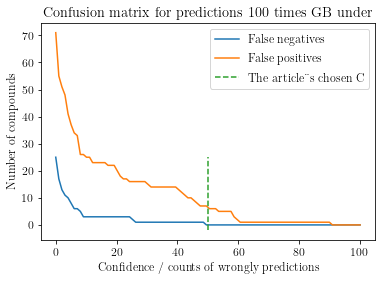

In [17]:
visualize.plot_confusion_matrix(PerovskiteModels, y, data, abbreviations=Abbreviations, names=prettyNames, k = numberSplits, n = numberRuns)

From the plot above, we can choose whichever confidence we would like to make a confusion matrix. The article has used a binomial distribution, without doing the statistics behind a one-side hypothesis test. Let us do better. 

We will start by excluding every compound that has been misclassified over 50% of the classifications.

[[ 83  53]
 [ 22 232]]


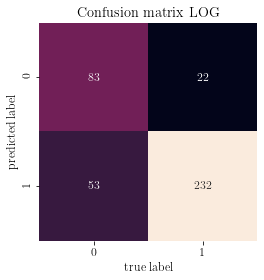

[[136   0]
 [  0 254]]


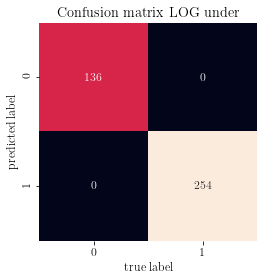

[[116  20]
 [ 16 238]]


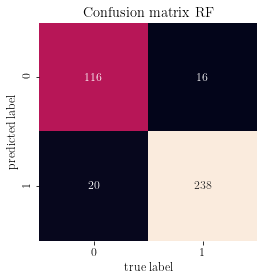

[[136   0]
 [  0 254]]


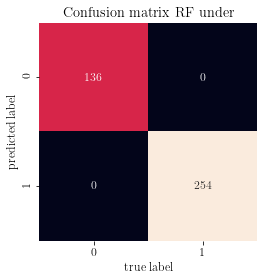

[[ 99  37]
 [ 19 235]]


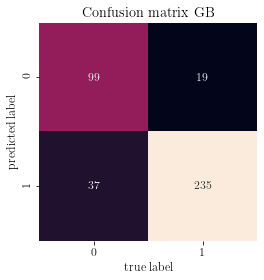

[[136   0]
 [  0 254]]


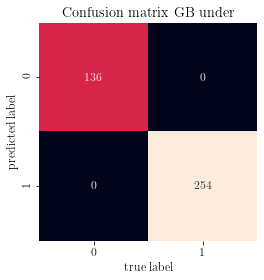

In [18]:
visualize.confusion_matrix_plot(PerovskiteModels, y, prettyNames)

### Preparing training data for the cubic classification

After training a model on the perovskite data, we would like to make a smaller subset of the dataset as the training data for a model that can classify a cubic perovskite versus a non-cubic perovskite. We will remove all compounds that got misclassified at least 50% of 100 classifications, in addition to non-perovskites. Thus, if two algorithms is seen with same compounds that are being removed due to false negatives but different number of false positives, they will have the same test data.

To start of, which compounds are predicted most times as perovskite, but are in fact non-perovskite? 

In [19]:
for i, model in enumerate(PerovskiteModels):
    print(prettyNames[i], ": over 50 percent misclassifications:")
    print("False negatives:")
    print(data['Compound'][model['falseNegatives'] > numberRuns*numberSplits/2])
    print("False positives:")
    print(data['Compound'][model['falsePositives'] > numberRuns*numberSplits/2])
    print("")

LOG  : over 50 percent misclassifications:
False negatives:
136    AgNbO3
137    AgTaO3
156    BiAlO3
176    CdGeO3
177    CdSnO3
273    MgSiO3
277    NaSbO3
294    PbGeO3
296    PbSnO3
297    PbTiO3
364     TlIO3
Name: Compound, dtype: object
False positives:
9      BaCoO3
10     BaCrO3
11     BaGeO3
12     BaMnO3
13     BaNiO3
14     BaSiO3
15     BaTeO3
22     CeDyO3
23     CeErO3
24     CeHoO3
32     CsBrO3
33     CsNbO3
34      CsVO3
49     FeTiO3
50     GaFeO3
51     GaInO3
57     InFeO3
58     InMnO3
59      KBiO3
63      KSbO3
64       KVO3
65      LaBO3
66     LaDyO3
89     MnTiO3
96     NdDyO3
97     NdLuO3
98     NdYbO3
101    NiTiO3
107    PrDyO3
108    PrErO3
109    PrHoO3
110    PrTmO3
114     RbVO3
115     SmBO3
116     SmYO3
118    SrSiO3
119    SrThO3
121    TlLaO3
126     TmYO3
127      YBO3
128     YbYO3
129     YInO3
Name: Compound, dtype: object

LOG under : over 50 percent misclassifications:
False negatives:
136    AgNbO3
137    AgTaO3
156    BiAlO3
157    BiFeO3

In [20]:
allowedOfNumberMiscalculations = 50
correctlyPredictedPerovskites = {}

for abbreviation in Abbreviations:     
    correctlyPredictedPerovskites[abbreviation] = visualize.findCorrectlyPredictedPerovskites(
        PerovskiteModels[abbreviation], data, allowedOfNumberMiscalculations)

#correctlyPredictedPerovskites["GB"]

## Save the models 

Now, we will save the perovskite-models for reproducability.

In [21]:
import pickle
for i, algorithm in tqdm(enumerate(Algorithms)):
    file_path = Path(models_dir / "perovskite" / Path(prettyNames[i] + ".pkl"))
    with file_path.open('wb') as fp:
        pickle.dump(algorithm, fp)

6it [00:00, 139.49it/s]


In [22]:
#correctlyPredictedPerovskites["RF "]

# Training the model for cubic perovskite or not

## Finding the optimal hyperparameters

We will here do the same procedure as for the perovskite model, however, with the added complexity that the different models will run on different data depending on what the model predicted for perovskites. 

In [23]:
rskfold = RepeatedStratifiedKFold(n_splits=numberSplits, n_repeats=numberRuns, random_state=random_state)
allFeatures = ["rA", "rB", "MA", "MB", "dAO", "dBO", "rA/rO", "rB/rO", "t"]
CubicModelsBestParams = pd.Series({}, dtype="string")
BestParamsAlgorithms = []
for i, algorithm in tqdm(enumerate(InsertAlgorithms)):
    for method in includeSampleMethods:
        print("Finding best params for: {}".format(InsertAbbreviations[i] + " " + method))
        bestEstimator, CubicModelsBestParams[InsertAbbreviations[i] + " " + method] = train_model.applyGridSearch(
                                                                            X = correctlyPredictedPerovskites[InsertAbbreviations[i] + " " + method][allFeatures],
                                                                            y = correctlyPredictedPerovskites[InsertAbbreviations[i] + " " + method]["Cubic"].values.reshape(-1,),
                                                                        model = algorithm, 
                                                                           cv = rskfold, 
                                                                 sampleMethod = method)
        # Only the parameters for the algorithm changes here, 
        # since pretty name and abbreviations are already done.
        BestParamsAlgorithms.append(bestEstimator)

0it [00:00, ?it/s]

Finding best params for: LOG 
Finding best params for: LOG under


1it [00:01,  1.71s/it]

Finding best params for: RF 
Finding best params for: RF under


2it [03:29, 122.98s/it]

Finding best params for: GB 
Finding best params for: GB under


3it [03:32, 70.93s/it] 


5it [00:00, 41.68it/s]

Current training algorithm: LOG 


100it [00:02, 42.28it/s]


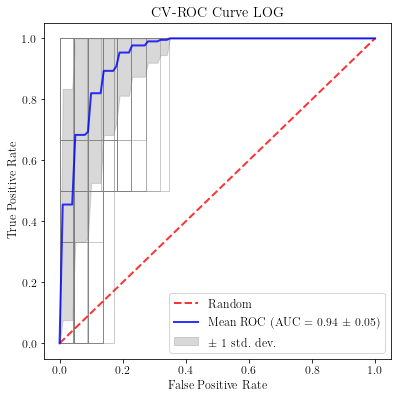

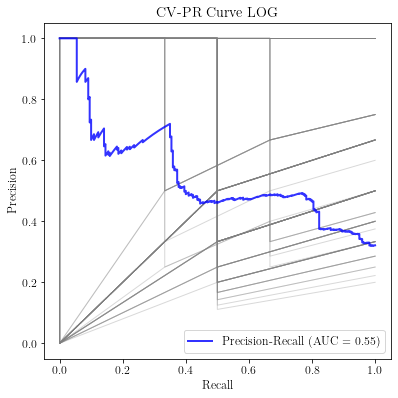

5it [00:00, 46.91it/s]

Mean accuracy:0.92357
Standard deviation:0.03358
f1-score:0.66667
Current training algorithm: LOG under


100it [00:02, 44.63it/s]


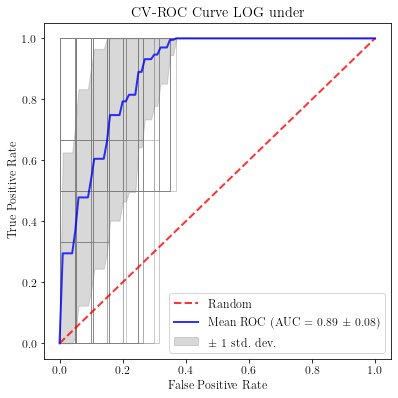

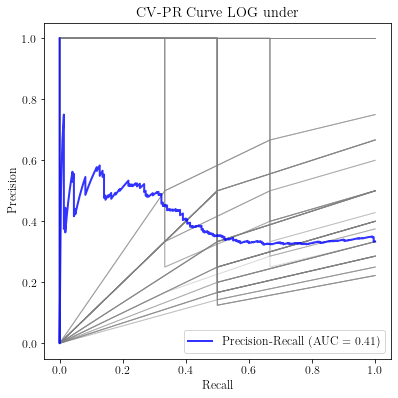

0it [00:00, ?it/s]

Mean accuracy:0.81284
Standard deviation:0.08184
f1-score:0.50000
Current training algorithm: RF 


100it [00:48,  2.08it/s]


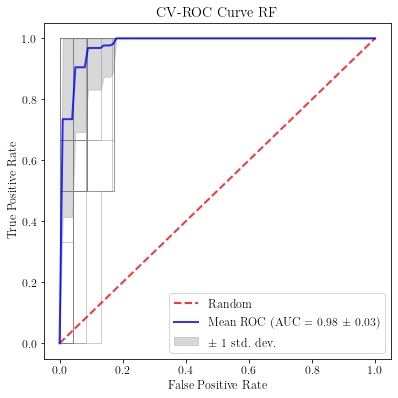

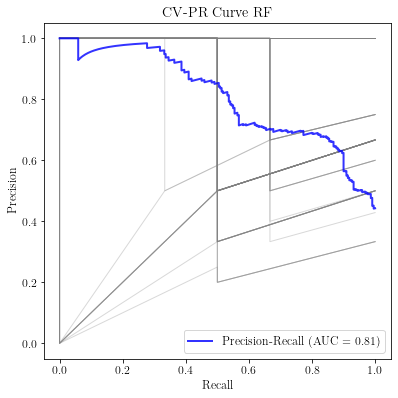

0it [00:00, ?it/s]

Mean accuracy:0.95182
Standard deviation:0.03980
f1-score:0.57143
Current training algorithm: RF under


100it [01:54,  1.15s/it]


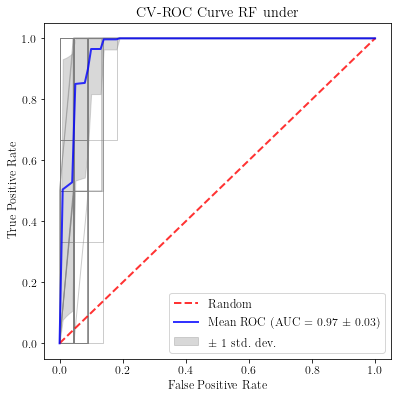

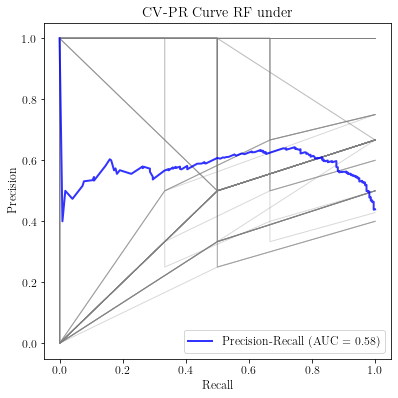

3it [00:00, 22.95it/s]

Mean accuracy:0.90320
Standard deviation:0.06573
f1-score:0.80000
Current training algorithm: GB 


100it [00:02, 33.37it/s]


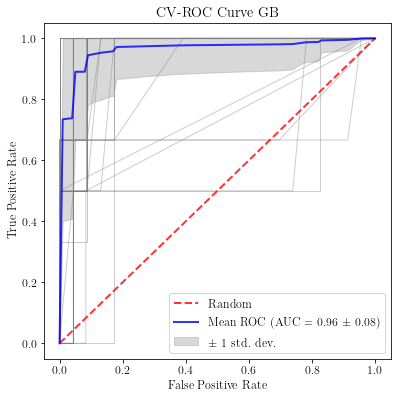

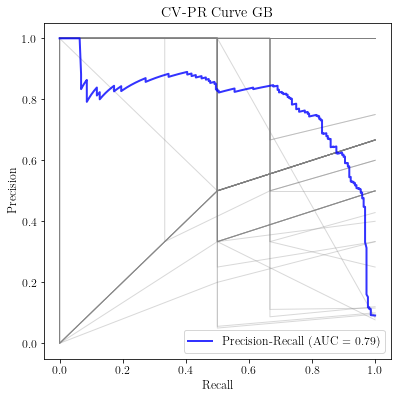

4it [00:00, 34.84it/s]

Mean accuracy:0.95145
Standard deviation:0.03562
f1-score:0.66667
Current training algorithm: GB under


100it [00:03, 33.20it/s]


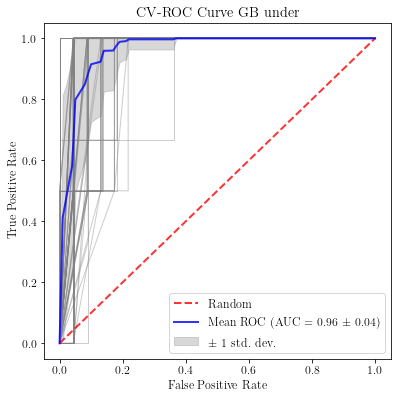

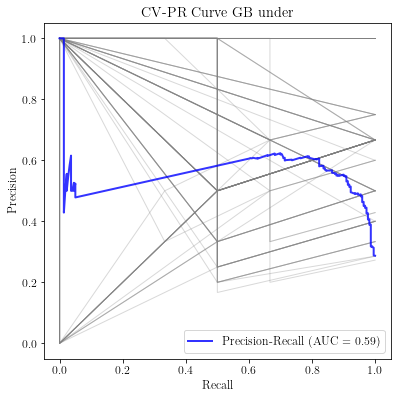

Mean accuracy:0.90285
Standard deviation:0.05663
f1-score:0.66667


In [24]:
CubicModels = pd.Series({}, dtype="string")
for i, algorithm in enumerate(BestParamsAlgorithms): 
    print("Current training algorithm: {}".format(prettyNames[i]))
    CubicModels[Abbreviations[i]] = (
        visualize.runSupervisedModel(classifier  = algorithm, 
                                     X = correctlyPredictedPerovskites[Abbreviations[i]][allFeatures],
                                     y = correctlyPredictedPerovskites[Abbreviations[i]]["Cubic"].values.reshape(-1,),
                                     k = numberSplits,
                                     n = numberRuns,
                                    cv = rskfold,
                     featureImportance = True,
                                 title = prettyNames[i]))

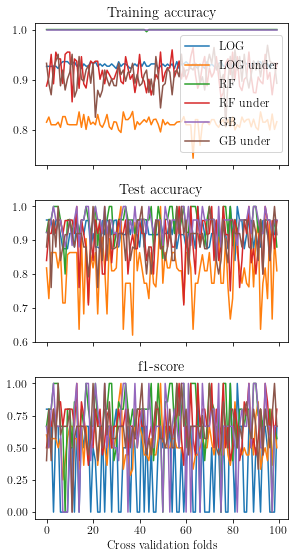

In [25]:
visualize.plot_accuracy(CubicModels, prettyNames)

In [26]:
visualize.plot_important_features(CubicModels, prettyNames, X, k = numberSplits, n = numberRuns)

In [27]:
for i, model in enumerate(CubicModels):
    print(X.columns[model["importantKeys"]>0])

Index(['rA', 'rB', 'MA', 'MB', 'dAO', 'dBO', 'rA/rO', 'rB/rO', 't'], dtype='object')
Index(['rA', 'rB', 'MA', 'MB', 'dAO', 'dBO', 'rA/rO', 'rB/rO', 't'], dtype='object')
Index(['rA', 'dBO', 'rA/rO', 't'], dtype='object')
Index(['rA', 'rB', 'dBO', 'rA/rO', 'rB/rO', 't'], dtype='object')
Index(['rA', 'rB', 'MA', 'dAO', 'dBO', 'rA/rO', 't'], dtype='object')
Index(['rA', 'rB', 'MA', 'dAO', 'dBO', 'rA/rO', 'rB/rO', 't'], dtype='object')


Once again, we see here that some of the features are redundant, as both random forrest and gradient boost agrees on rA, rA/rO and t as features. 

In [28]:
visualize.plot_confusion_metrics(CubicModels, 
                                 prettyNames, 
                                 correctlyPredictedPerovskites, 
                                 k = numberSplits, 
                                 n = numberRuns, 
                                 abbreviations = Abbreviations, 
                                 cubicCase = True)

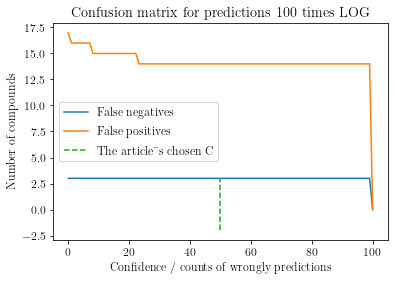

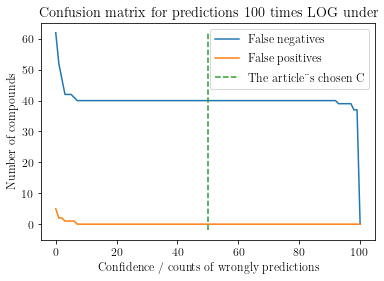

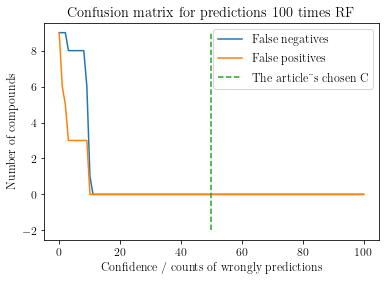

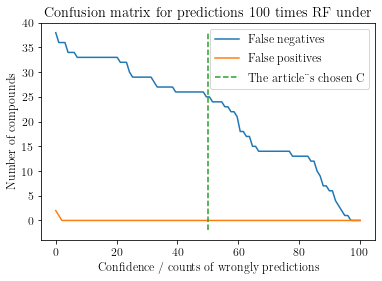

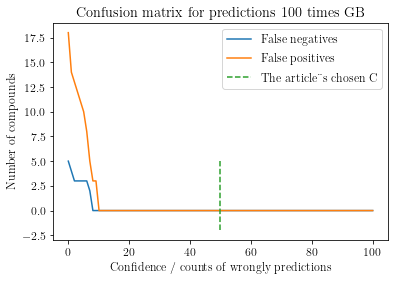

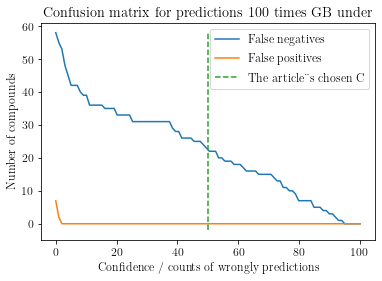

In [29]:
visualize.plot_confusion_matrix(CubicModels,\
                      correctlyPredictedPerovskites,\
                      correctlyPredictedPerovskites,
                      abbreviations = Abbreviations,
                      names = prettyNames,
                      k = numberSplits,
                      n = numberRuns,
                      cubicCase = True
                               )

# Predictions on the test set

We will be using the generated training datasets for both the perovskite and cubic classification to train a model, which will be used to classify a completely independent test dataset. 

## Predicting perovskites

In [30]:
PerovskiteModels[Abbreviations[i]]["importantKeys"]>0

array([False,  True,  True,  True,  True, False, False,  True,  True])

In [31]:
PerovskiteModels[Abbreviations[0]]["importantKeys"]

array([100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [32]:
PerovskiteTestData = pd.read_csv(data_dir / "processed" / "625TestData.csv")

Summary             = pd.DataFrame({}, dtype="string")
Summary["Compound"] = PerovskiteTestData["Compound"]

PredictedPerovskites = pd.Series({}, dtype="string")

threshold = numberSplits*numberRuns/2 #50% when equal

for i, algorithm in enumerate(Algorithms):#
    PredictedPerovskites[Abbreviations[i]+" P"], PredictedPerovskites[Abbreviations[i]+" P Prob"] = predict_model.runPredictions(algorithm,\
                                    trainingData   = X[X.columns[PerovskiteModels[Abbreviations[i]]["importantKeys"]>threshold]],\
                                    trainingTarget = y.values.reshape(-1,),\
                                    testData   = PerovskiteTestData[PerovskiteTestData[allFeatures].columns[PerovskiteModels[Abbreviations[i]]["importantKeys"]>threshold]])

for abbreviation in Abbreviations:
    PerovskiteTestData[abbreviation + " P"] = PredictedPerovskites[abbreviation + " P"]
    Summary[abbreviation + " P"]            = PredictedPerovskites[abbreviation + " P"]
    Summary[abbreviation + " P Prob"]       = PredictedPerovskites[abbreviation + " P Prob"]
    print(abbreviation, "predict the number of perovskites as: ", np.sum(PredictedPerovskites[abbreviation+" P"]))

Pipeline(steps=[('model',
                 LogisticRegression(max_iter=200, random_state=98127480))])
Pipeline(steps=[('underSampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 LogisticRegression(max_iter=200, random_state=98127480))])
Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=5, n_estimators=500,
                                        random_state=98127480))])
Pipeline(steps=[('underSampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=500,
                                        random_state=98127480))])
Pipeline(steps=[('model',
                 GradientBoostingClassifier(max_depth=5, max_features='log2',
                                            n_estimators=10,
                                            random_state=98127480))])
Pipeline(steps=[('underSampler',


In [33]:
Summary

Compound  LOG  P  LOG  P Prob  LOG under P  LOG under P Prob  RF  P  \
0      AgIO3       0     0.439227            0          0.282150      1   
1     AgPaO3       1     0.633461            0          0.416908      1   
2     AgReO3       0     0.338361            0          0.231772      0   
3      AgUO3       1     0.614203            0          0.404327      1   
4      AgWO3       0     0.380237            0          0.255897      1   
..       ...     ...          ...          ...               ...    ...   
620   ScYbO3       1     0.918426            1          0.821779      0   
621    ScYO3       1     0.952281            1          0.875991      0   
622   ErLaO3       1     0.948428            1          0.853514      0   
623   HoLaO3       1     0.951194            1          0.860023      0   
624   TmLaO3       1     0.945454            1          0.846522      0   

     RF  P Prob  RF under P  RF under P Prob  GB  P  GB  P Prob  GB under P  \
0      0.540667           1         0.512686      0    0.275437           0   
1      0.618123           0         0.373465      0    0.481424           1   
2      0.189020           0         0.147759      0    0.310930           0   
3      0.527657           0         0.326855      0    0.481424           0   
4      0.736663           1         0.718812      1    0.567332           1   
..          ...         ...              ...    ...         ...         ...   
620    0.260497           0         0.173254      1    0.550273           0   
621    0.221443           0         0.176063      1    0.550273           0   
622    0.233032           0         0.213443      0    0.317126           0   
623    0.218411           0         0.213443      0    0.317126           0   
624    0.233032           0         0.217761      0    0.317126           0   

     GB under P Prob  
0           0.194016  
1           0.538276  
2           0.201015  
3           0.473925  
4           0.586588  
..               ...  
620         0.170883  
621         0.171324  
622         0.184244  
623         0.278459  
624         0.184244  

[625 rows x 13 columns]

## Finding training and test data for the cubic prediction
Now, we need to remove all the non-perovskite in order to classify them into cubic-perovskites or non-cubic perovskites. Alas, the results above does imply many different training sets because of different results from the classifiers from the previous classification.  

In [34]:
CubicTestData = pd.Series({}, dtype="string")

def RemoveNonPerovskites(predictions):
    remove_indices = np.array(PerovskiteTestData['Compound'][predictions == 0].index)
    cubicTestData = PerovskiteTestData.drop(index=remove_indices)
    cubicTestData.reset_index(drop=False, inplace=True)
    return cubicTestData

for abbreviation in Abbreviations:
    CubicTestData[abbreviation] = RemoveNonPerovskites(PerovskiteTestData[abbreviation+" P"])

In [35]:
print(CubicTestData["RF "].shape)
print(CubicTestData["GB "].shape)

(192, 19)
(220, 19)


However, here we meet a challenge since the training data does only contain less than 9 percent cubic perovskites. When training the model earlier, we used a stratified cross fold validation scheme to create training and validation sets on the basis of a 50/50 split. We did this by the help of a stratified parameter which is built into SciKitLearn. Now, we would like to use all of the cubic data while keeping it 50/50 on the entire dataset, but this we need to make ourself. 

In [36]:
#Not using pandas dataframe because the contents does not neccessarily have the same shape
stratifiedCubicData = pd.Series({}, dtype="string")

#choose percentage of data that should be cubic. 50/50 split is percentage=0.085
percentage = 0.25

def getStratifiedTrainingData(predictedPerovskites, Name):
    cubics    = predictedPerovskites.iloc[predictedPerovskites["Cubic"][predictedPerovskites["Cubic"]==1].index]
    nonCubics = predictedPerovskites.iloc[predictedPerovskites["Cubic"][predictedPerovskites["Cubic"]!=1].index]
    print(Name, ":")
    print("The amount of cubic perovskites entries in the data is {}, with a total percentage of {}"\
          .format(np.sum(cubics["Cubic"]), np.sum(cubics["Cubic"])/len(predictedPerovskites["Cubic"])))
    
    # The data trained on should be evenly distributed. Here, we are just picking random numbers. 
    nonCubicsSubSet = nonCubics.sample(n = int(percentage*len(predictedPerovskites.index)), random_state=random_state)

    #test to make the reader aware of the distribution in the training data
    if (nonCubicsSubSet.shape!=cubics.shape):
        print("Current shape Cubics: {} and nonCubics: {}".format(cubics.shape, nonCubicsSubSet.shape))
    
    #Combining the subsets
    stratCubicData = pd.concat([cubics, nonCubicsSubSet])
    stratCubicData.reset_index(drop=False, inplace=True)
    return stratCubicData

for abbreviation in Abbreviations: 
    print("Name  :{}".format(abbreviation))
    print("Shape :{}".format(correctlyPredictedPerovskites[abbreviation].shape))
    stratifiedCubicData[abbreviation] = getStratifiedTrainingData(correctlyPredictedPerovskites[abbreviation], abbreviation)

Name  :LOG 
Shape :(243, 12)
LOG  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.09053497942386832
Current shape Cubics: (22, 12) and nonCubics: (60, 12)
Name  :LOG under
Shape :(217, 12)
LOG under :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.10138248847926268
Current shape Cubics: (22, 12) and nonCubics: (54, 12)
Name  :RF 
Shape :(253, 12)
RF  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08695652173913043
Current shape Cubics: (22, 12) and nonCubics: (63, 12)
Name  :RF under
Shape :(247, 12)
RF under :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08906882591093117
Current shape Cubics: (22, 12) and nonCubics: (61, 12)
Name  :GB 
Shape :(253, 12)
GB  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08695652173913043
Current shape Cubics: (22, 12) and nonCubics: (63, 12)
N

# Predicting cubic perovskites
Now that we have stratified data, we can finally fit our classifier.


In [37]:
for i, data in enumerate(stratifiedCubicData):
    print("The shape of {} is: {}".format(prettyNames[i], data.shape))

The shape of LOG  is: (82, 13)
The shape of LOG under is: (76, 13)
The shape of RF  is: (85, 13)
The shape of RF under is: (83, 13)
The shape of GB  is: (85, 13)
The shape of GB under is: (84, 13)


In [38]:
PredictedCubics = {}
for i, algorithm in enumerate(Algorithms):
    PredictedCubics[Abbreviations[i]+" C"], PredictedCubics[Abbreviations[i]+" C Prob"] = predict_model.runPredictions(algorithm,\
                                    trainingData   = stratifiedCubicData[Abbreviations[i]][stratifiedCubicData[Abbreviations[i]][allFeatures].columns[CubicModels[Abbreviations[i]]["importantKeys"]>threshold]],\
                                    trainingTarget = stratifiedCubicData[Abbreviations[i]]["Cubic"],\
                                    testData   = CubicTestData[Abbreviations[i]][CubicTestData[Abbreviations[i]][allFeatures].columns[CubicModels[Abbreviations[i]]["importantKeys"]>threshold]])
    print(Abbreviations[i], " predict the number of cubic perovskites as: ", np.sum(PredictedCubics[Abbreviations[i]+" C"]))      

Pipeline(steps=[('model',
                 LogisticRegression(max_iter=200, random_state=98127480))])
LOG   predict the number of cubic perovskites as:  15
Pipeline(steps=[('underSampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 LogisticRegression(max_iter=200, random_state=98127480))])
LOG under  predict the number of cubic perovskites as:  31
Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=5, n_estimators=500,
                                        random_state=98127480))])
RF   predict the number of cubic perovskites as:  16
Pipeline(steps=[('underSampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=500,
                                        random_state=98127480))])
RF under  predict the number of cubic perovskites as:  16
Pipeline(steps=[('model',
                 G

In [39]:
for abbreviation in Abbreviations:
    tmp1 = np.empty(len(Summary.index))
    tmp2 = np.copy(tmp1)
    tmp2[:] = np.nan
    tmp1[:] = -1 #For all non-perovskites

    tmp1[CubicTestData[abbreviation]["index"][PredictedCubics[abbreviation + " C"] == 1].values] = 1
    tmp1[CubicTestData[abbreviation]["index"][PredictedCubics[abbreviation + " C"] == 0].values] = 0

    tmp2[CubicTestData[abbreviation]["index"].values] = PredictedCubics[abbreviation + " C Prob"]

    Summary[abbreviation + " C"]       = tmp1.astype(int)
    Summary[abbreviation + " C Prob"]  = tmp2

In [40]:
Summary[Summary["GB  C"]==1]

Compound  LOG  P  LOG  P Prob  LOG under P  LOG under P Prob  RF  P  \
86    SrCrO3       1     0.844819            1          0.737722      1   
212   CsBiO3       1     0.778269            1          0.630033      1   
213   CsPaO3       1     0.929603            1          0.825284      1   
217    CsUO3       1     0.923869            1          0.817353      1   
221   RbBiO3       1     0.698089            1          0.532610      1   
231    BaVO3       1     0.889990            1          0.798382      1   
379   SrNiO3       1     0.798263            1          0.684022      1   

     RF  P Prob  RF under P  RF under P Prob  GB  P  ...  LOG under C  \
86     0.984660           1         0.978266      1  ...            1   
212    0.724965           1         0.684408      1  ...            1   
213    0.826726           1         0.814592      1  ...            1   
217    0.724965           1         0.684408      1  ...            1   
221    0.959766           1         0.863921      1  ...            1   
231    0.966907           1         0.949471      1  ...            1   
379    0.967865           1         0.945377      1  ...            1   

     LOG under C Prob  RF  C  RF  C Prob  RF under C  RF under C Prob  GB  C  \
86           0.611264      1    0.710990           1         0.897078      1   
212          0.928606      1    0.666538           1         0.561500      1   
213          0.935255      1    0.666538           1         0.628833      1   
217          0.934611      1    0.666538           1         0.561500      1   
221          0.926167      1    0.989983           1         0.975833      1   
231          0.619181      1    0.819491           1         0.911707      1   
379          0.609279      1    0.806323           1         0.923078      1   

     GB  C Prob  GB under C  GB under C Prob  
86     0.671642           1         0.820731  
212    0.502071          -1              NaN  
213    0.518003           1         0.820961  
217    0.502071          -1              NaN  
221    0.741300           1         0.820731  
231    0.598904           1         0.813078  
379    0.671642           1         0.820731  

[7 rows x 25 columns]

Here, we see our candidates with their probabilities.

In [41]:
Summary.to_csv(data_dir / "summary" / "625SupervisedPredictions.csv", sep=",", index = False)

In [42]:
Summary

Compound  LOG  P  LOG  P Prob  LOG under P  LOG under P Prob  RF  P  \
0      AgIO3       0     0.439227            0          0.282150      1   
1     AgPaO3       1     0.633461            0          0.416908      1   
2     AgReO3       0     0.338361            0          0.231772      0   
3      AgUO3       1     0.614203            0          0.404327      1   
4      AgWO3       0     0.380237            0          0.255897      1   
..       ...     ...          ...          ...               ...    ...   
620   ScYbO3       1     0.918426            1          0.821779      0   
621    ScYO3       1     0.952281            1          0.875991      0   
622   ErLaO3       1     0.948428            1          0.853514      0   
623   HoLaO3       1     0.951194            1          0.860023      0   
624   TmLaO3       1     0.945454            1          0.846522      0   

     RF  P Prob  RF under P  RF under P Prob  GB  P  ...  LOG under C  \
0      0.540667           1         0.512686      0  ...           -1   
1      0.618123           0         0.373465      0  ...           -1   
2      0.189020           0         0.147759      0  ...           -1   
3      0.527657           0         0.326855      0  ...           -1   
4      0.736663           1         0.718812      1  ...           -1   
..          ...         ...              ...    ...  ...          ...   
620    0.260497           0         0.173254      1  ...            0   
621    0.221443           0         0.176063      1  ...            0   
622    0.233032           0         0.213443      0  ...            0   
623    0.218411           0         0.213443      0  ...            0   
624    0.233032           0         0.217761      0  ...            0   

     LOG under C Prob  RF  C  RF  C Prob  RF under C  RF under C Prob  GB  C  \
0                 NaN      0    0.022259           0         0.371790     -1   
1                 NaN      0    0.063159          -1              NaN     -1   
2                 NaN     -1         NaN          -1              NaN     -1   
3                 NaN      0    0.080327          -1              NaN     -1   
4                 NaN      1    0.806990           1         0.730567      0   
..                ...    ...         ...         ...              ...    ...   
620          0.135153     -1         NaN          -1              NaN      0   
621          0.141404     -1         NaN          -1              NaN      0   
622          0.000019     -1         NaN          -1              NaN     -1   
623          0.000044     -1         NaN          -1              NaN     -1   
624          0.000008     -1         NaN          -1              NaN     -1   

     GB  C Prob  GB under C  GB under C Prob  
0           NaN          -1              NaN  
1           NaN           1         0.727164  
2           NaN          -1              NaN  
3           NaN          -1              NaN  
4      0.281424           1         0.773636  
..          ...         ...              ...  
620    0.094243          -1              NaN  
621    0.094244          -1              NaN  
622         NaN          -1              NaN  
623         NaN          -1              NaN  
624         NaN          -1              NaN  

[625 rows x 25 columns]